In [38]:
import pandas as pd    
from pandas import DataFrame            
import glob
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
from tsfresh.feature_selection import select_features


In [2]:
import glob
import pandas as pd
from pandas import DataFrame, Series

def prepare_data():
   # Step 1: List all CSV files
    csv_files = glob.glob('*.{}'.format('csv'))
    csv_files = csv_files[0:-1]

    # Step 2: Select the 'material' column in 'measurements.csv'
    measure = pd.read_csv('measurements.csv')
    df_measure_target = pd.DataFrame(measure).material.tolist()

    # Step 3: Combine each target value with each CSV dataset and add an ID
    data_frames = [] 
    for i, file in enumerate(csv_files):
        df = pd.read_csv(file)
        df['id'] = i
        data_frames.append(df)

    # Step 4: Convert all CSV dataset to a DataFrame
    df_full = pd.concat(data_frames, ignore_index=True)

    # Step 5: Convert measurement-target to a Series
    measure_series = pd.Series(df_measure_target)

    return df_full, measure_series 

timeDataframe_Targetvariable = prepare_data()

FileNotFoundError: [Errno 2] No such file or directory: 'measurements.csv'

In [1]:
# Minimale Feature extrahieren

def feature_extraction_mini(df: DataFrame):
    extraction_settings = MinimalFCParameters()
    extracted_features = extract_features(df, column_id = 'id',  default_fc_parameters=extraction_settings)
    return extracted_features


NameError: name 'DataFrame' is not defined

ersatz von MinimalFeature_extrahieren mittels tsfresh


In [ ]:
import numpy as np


def feature_extraction_mini_numpy(dataframe):
    median_Voltage = []
    Current__sum_values = []
    Audio__standard_deviation = []
    Audio__root_mean_square	= []
    median_Current = []

    for name, group in dataframe.groupby("id"):
        median_Voltage.append(np.median(group["Voltage"]))
        Current__sum_values.append(np.sum(group["Current"]))
        Audio__standard_deviation.append(np.std(group["Audio"]))
        Audio__root_mean_square	.append(np.sqrt(np.mean(group['Audio']**2)))
        median_Current.append(np.median(group["Current"]))

    data = {'median_Voltage': median_Voltage, 
            'Current__sum_values': Current__sum_values, 
            'Audio__standard_deviation': Audio__standard_deviation,
            'Audio__root_mean_square': Audio__root_mean_square,
            'median_Current': median_Current}

    df = pd.DataFrame(data)
    return df 


# ANALYSE DER UNTERSCHIEDLICHE FEATURE_EXTRAHIERUNGSMETHODEN 

In [42]:
# alle Features, die benutzt werden
minn = MinimalFCParameters()

pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None) 
print('voher')

df_minn = pd.DataFrame([(key, value) for key, value in minn.items()], columns=['Feature', 'Parameter'])


voher


# extrahieren mit mininmale 


In [37]:

result_minimalFCParameters= feature_extraction_mini(timeDataframe_Targetvariable[0])
print(result_minimalFCParameters)


Feature Extraction: 100%|██████████| 40/40 [00:05<00:00,  7.16it/s]

    Audio__sum_values  Audio__median  Audio__mean  Audio__length  \
0        6.810795e+05        1.75293     1.754347       388224.0   
1        6.073877e+05        1.75293     1.754239       346240.0   
2        9.542527e+05        1.75293     1.756207       543360.0   
3        7.819578e+05        1.75293     1.753961       445824.0   
4        8.923840e+05        1.75293     1.753899       508800.0   
5        1.028583e+06        1.75293     1.754159       586368.0   
6        9.903052e+05        1.75293     1.753970       564608.0   
7        7.298980e+05        1.75293     1.754023       416128.0   
8        8.083044e+05        1.75293     1.754620       460672.0   
9        9.104037e+05        1.75293     1.754014       519040.0   
10       8.274273e+05        1.75293     1.754213       471680.0   
11       7.608445e+05        1.75293     1.753939       433792.0   
12       7.504567e+05        1.75293     1.753797       427904.0   
13       9.194108e+05        1.75293     1.75406

In [43]:
# Die methode bekommt die features und die zielvariable 
def select_feat(df: DataFrame, s: pd.Series):
    x_selected = select_features(feature_extraction_mini(df), s)
    return x_selected


# selektieren die features (MinimalFCParameters())

In [29]:
# Minimalefeatures extrahtion nach der selektion

select_features(result_minimalFCParameters, timeDataframe_Targetvariable[1])

,Voltage__mean,Voltage__root_mean_square,Voltage__median,Current__mean,Current__sum_values,Current__root_mean_square,Audio__standard_deviation,Audio__variance,Audio__root_mean_square,Current__median
0,18.851474,18.864589,18.517109,4.409046,1.711698e+06,5.623076,0.446563,0.199419,1.810290,5.797831
1,18.746273,18.758370,18.492905,4.669996,1.616939e+06,5.803293,0.436312,0.190368,1.807684,5.724588
2,19.089487,19.099316,19.303783,2.949693,1.602745e+06,4.349802,0.621103,0.385769,1.862802,1.110331
3,19.211386,19.217615,19.291681,2.360632,1.052426e+06,3.619498,0.258212,0.066673,1.772865,0.670878
4,19.292197,19.297527,19.412708,1.958579,9.965251e+05,3.159602,0.213135,0.045426,1.766802,0.670878
5,19.019907,19.032990,19.267475,3.041997,1.783730e+06,4.910358,0.338183,0.114368,1.786461,0.890604
6,19.164491,19.169792,19.267475,2.218709,1.252701e+06,3.362837,0.279721,0.078244,1.776134,0.670878
7,18.932141,18.945391,19.182756,3.234813,1.346096e+06,5.074498,0.372646,0.138865,1.793171,1.183573
8,19.157066,19.163106,19.231169,2.193681,1.010567e+06,3.457676,0.464045,0.215338,1.814946,0.670878
9,19.001841,19.010834,19.206963,2.889160,1.499589e+06,4.221159,0.369314,0.136393,1.792473,0.890604


## die EfficientFCParameters() ist fast das gleiche wie ComprehensiveFCParameters
### die haben fast die gleiche Anzahl an Features. Deshalb werde ich mit ComprehensiveFCParameters arbeiten. Sie hat 76 Feautes und die EfficientFCParameter() 73 Features

In [44]:
# NUN werde ich die EffiecientFCParameter
from tsfresh.feature_extraction import EfficientFCParameters

eff = EfficientFCParameters()
# Anpassen der Pandas-Optionen für die Anzeige
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None) 

df_eff = pd.DataFrame([(key, value) for key, value in eff.items()], columns=['Feature', 'Parameter'])


# START DER EXTRAHIERUNG BZW. SELEKTIERUNG DER FEATURES MIT COMPREHENSIVERFCPARAMETER

In [45]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [46]:
# Die Parameter anschauen
settings_comprehensive_ohne = ComprehensiveFCParameters()

# Anpassen der Pandas-Optionen für die Anzeige
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None) 

df_com = pd.DataFrame([(key, value) for key, value in settings_comprehensive_ohne.items()], columns=['Feature', 'Parameter'])


In [47]:
# DAMIT WERDEN DIE FEATURES BERECHNET

features_to_delete = ["symmetry_looking", "autocorrelation","agg_autocorrelation", "partial_autocorrelation", "cwt_coefficients","ar_coefficient", "change_quantiles",  "fft_coefficient", "augmented_dickey_fuller",'sample_entropy', 'number_cwt_peaks','approximate_entropy' , 'friedrich_coefficients','max_langevin_fixed_point', 'query_similarity_count']
df_com = df_com[~df_com['Feature'].isin(features_to_delete)]
df_com.reset_index(drop="index", inplace=True)
df_com

para_dict = df_com.set_index('Feature').to_dict()['Parameter']

In [35]:
# Funktion für Feature extrahieren mittels Comprehensiver-Setting

def feature_extraction_Comprehensiver(df: DataFrame, d: dict):
    extraction_settings = d
    extracted_features = extract_features(df, column_id = 'id',default_fc_parameters= extraction_settings)
    return extracted_features



In [36]:
# Feautre Extrahieren mit Teile der Comprehensiver_Setting 

featur =feature_extraction_Comprehensiver(timeDataframe_Targetvariable[0], para_dict)
ordnerpfad = r"C:\Users\Lenovo\Documents\Uni Offenburg\3.Semester\ella_nervt\features"
selected_features =select_features(featur, timeDataframe_Targetvariable[1])
ordnerpfad1 = r"C:\Users\Lenovo\Documents\Uni Offenburg\3.Semester\ella_nervt\features_selected"
# nur ein csv Datei 
featur.to_csv(f"{ordnerpfad}\\Features_extrahieren_Mit_Com_teilnummer.csv", index= False)
selected_features.to_csv(f"{ordnerpfad1}\\Features_extrahieren_Mit_Com_teilnummer.csv", index= False)



Feature Extraction: 100%|██████████| 40/40 [10:07<00:00, 15.20s/it]


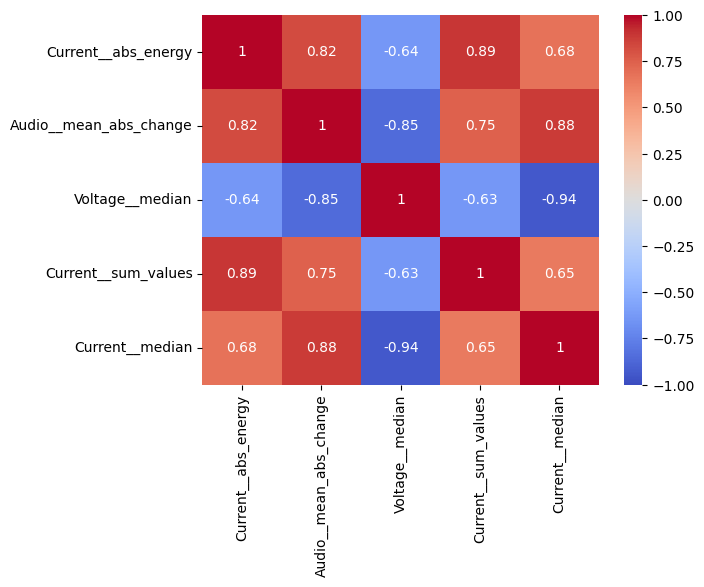

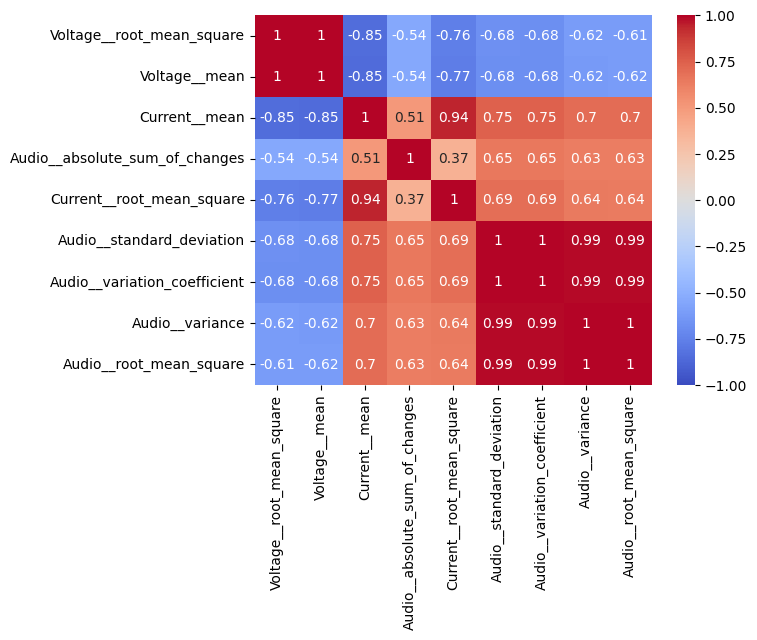

Fehler beim Verarbeiten der Datei C:\Users\Lenovo\Documents\Uni Offenburg\3.Semester\ella_nervt\features\Features_extrahieren_Mit_Com_teilnummer3.csv: No columns to parse from file


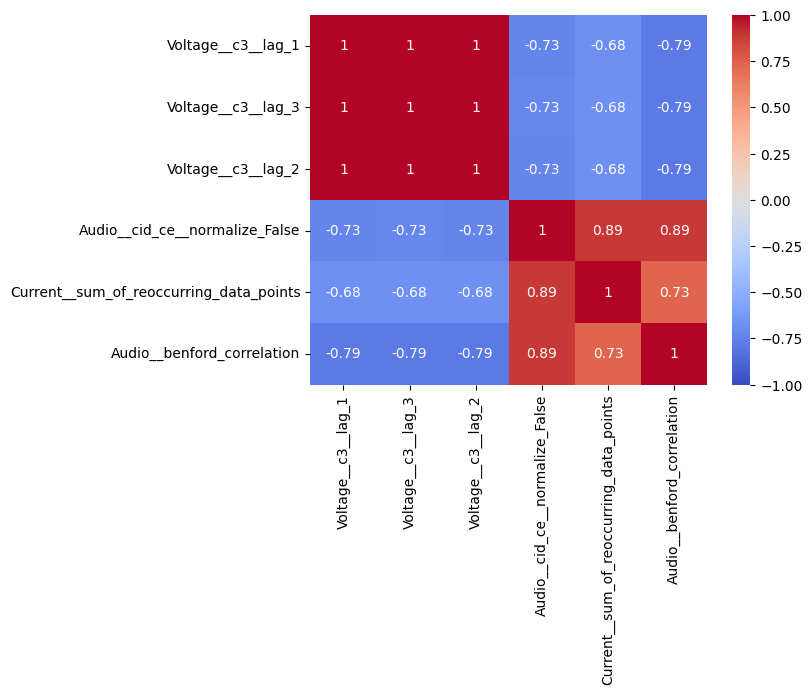

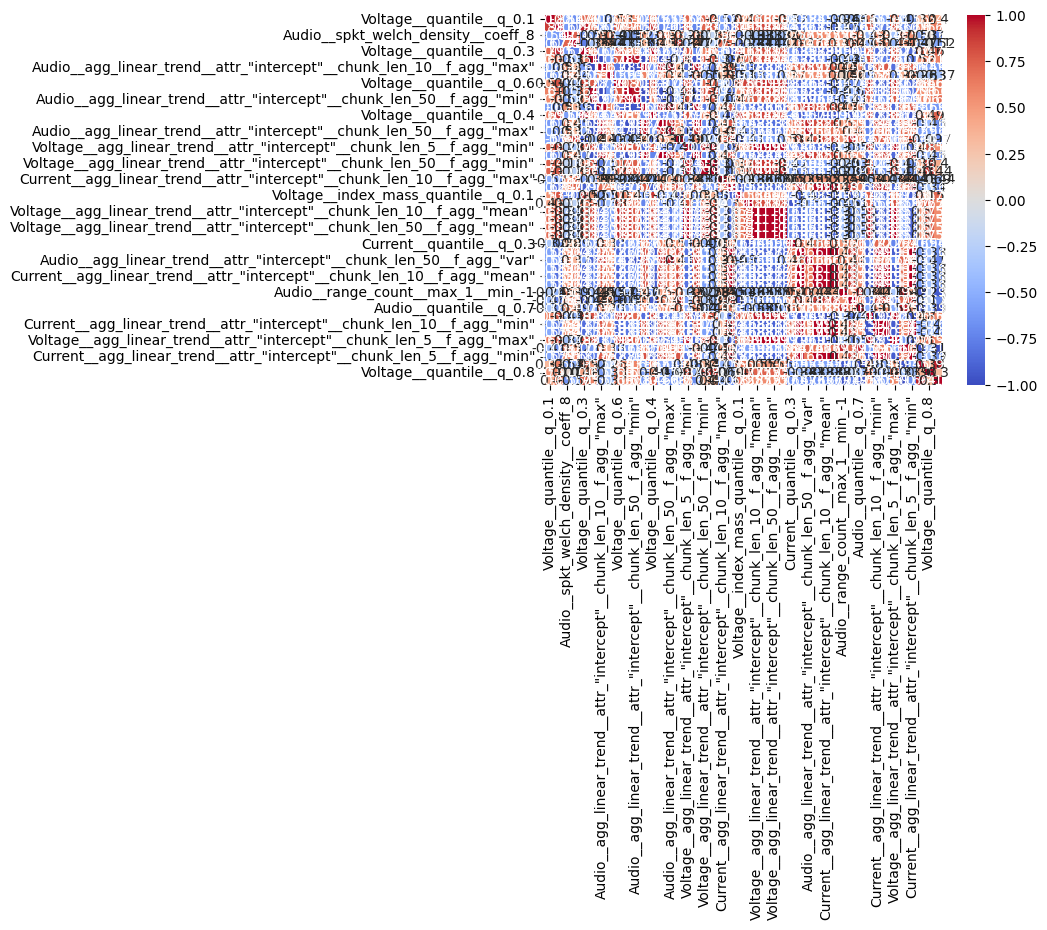

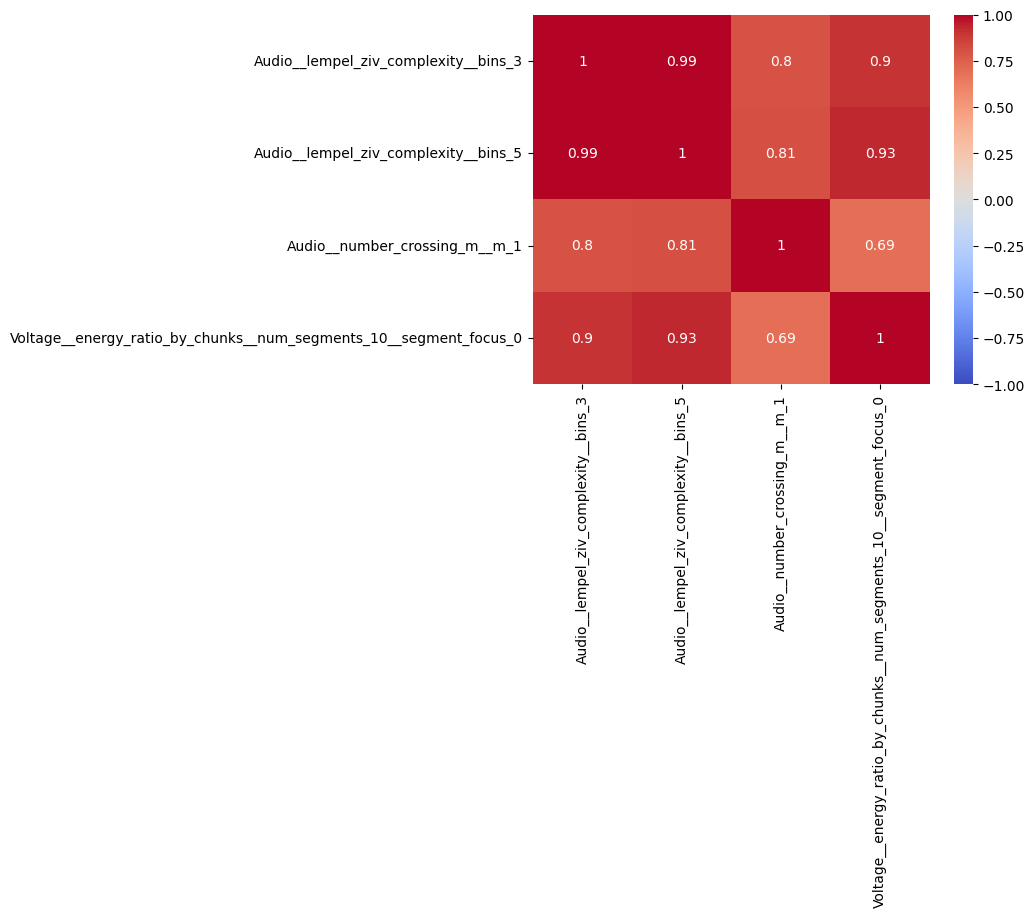

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pfadeinstellungen
folder_path = r"C:\Users\Lenovo\Documents\Uni Offenburg\3.Semester\ella_nervt\features"  # Ersetze dies durch den tatsächlichen Pfad zu deinem Ordner

# Iteriere über alle Dateien im Ordner
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        try:
            # Lese die CSV-Datei ein und füge sie zur Liste hinzu
            df = pd.read_csv(file_path)

            # Überprüfe die Anzahl der Zeilen
            if len(df) == 0:
                continue

            matrix = df.corr()
            ax = sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.show()
            
        except Exception as e:
            print(f"Fehler beim Verarbeiten der Datei {file_path}: {e}")
    